In [15]:
# importing the required libraries
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
warnings.filterwarnings('ignore')

In [2]:
year = [2010,2011,2012,2013,2014]
months = ['january','february','march','april','may','june','july','august','september','october','november','december']

In [3]:
date = []
temp_C = []
temp_F = []
dewPoint_C = []
dewPoint_F = []
humidity = []
windSpeed_kph = []
windSpeed_mph = []
pressure_hg = []
pressure_mb = []
precipitation_mm = []
precipitation_in = []

In [4]:
for y in year:
    for m in months:
        url = 'https://tcktcktck.org/uttarakhand/'+m+'-'+str(y)
        response = requests.get(url)
        #getting the content
        src = response.content

        #creating the BeautifulSoup object
        soup = BeautifulSoup(src,'html.parser')

        #getting all the tables form the webpage
        table = soup.find_all("table")
        
        #getting all the rows of the table 
        rows = table[1].find_all("tr")

        
        for i in range(2,len(rows)):
            row_values = rows[i].find_all("td")
            date.append(row_values[0].text.strip())
            temp_C.append(row_values[1].text.split('|')[0].strip())
            temp_F.append(row_values[1].text.split('|')[1].strip())
            dewPoint_C.append(row_values[2].text.split('|')[0].strip())
            dewPoint_F.append(row_values[2].text.split('|')[1].strip())
            humidity.append(row_values[3].text.strip())
            windSpeed_kph.append(row_values[4].text.split('|')[0].strip())
            windSpeed_mph.append(row_values[4].text.split('|')[1].strip())
            pressure_hg.append(row_values[5].text.split('|')[0].strip())
            pressure_mb.append(row_values[5].text.split('|')[1].strip())
            precipitation_mm.append(row_values[6].text.split('|')[0].strip())
            precipitation_in.append(row_values[6].text.split('|')[1].strip())

In [5]:
data = {
    "Date" : date,
    "Temperature (C)": temp_C,
    "Temperature (F)": temp_F,
    "Dew Point (C)": dewPoint_C,
    "Dew Point (F)": dewPoint_F,
    "Humidity": humidity,
    "Wind Speed (kph)":windSpeed_kph,
    "Wind Speed (mph)":windSpeed_mph,
    "Pressure (hg)":pressure_hg,
    "Pressure (mb)":pressure_mb,
    "Precipitation (mm)": precipitation_mm,
    "Precipitation (in)": precipitation_in,
}
data = pd.DataFrame(data)
data.head()

,Date,Temperature (C),Temperature (F),Dew Point (C),Dew Point (F),Humidity,Wind Speed (kph),Wind Speed (mph),Pressure (hg),Pressure (mb),Precipitation (mm),Precipitation (in)
0,2010-01-01,11,51.8,-1,30.2,52,6,3.73,30.06,1018,0.0,0.0
1,2010-01-02,12,53.6,0,32.0,54,6,3.73,30.09,1019,0.0,0.0
2,2010-01-03,12,53.6,-0,32.0,49,5,3.11,30.09,1019,0.0,0.0
3,2010-01-04,13,55.4,4,39.2,62,8,4.97,30.0,1016,0.0,0.0
4,2010-01-05,12,53.6,1,33.8,55,6,3.73,29.94,1014,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                1826 non-null   object
 1   Temperature (C)     1826 non-null   object
 2   Temperature (F)     1826 non-null   object
 3   Dew Point (C)       1826 non-null   object
 4   Dew Point (F)       1826 non-null   object
 5   Humidity            1826 non-null   object
 6   Wind Speed (kph)    1826 non-null   object
 7   Wind Speed (mph)    1826 non-null   object
 8   Pressure (hg)       1826 non-null   object
 9   Pressure (mb)       1826 non-null   object
 10  Precipitation (mm)  1826 non-null   object
 11  Precipitation (in)  1826 non-null   object
dtypes: object(12)
memory usage: 171.3+ KB


In [7]:
data

,Date,Temperature (C),Temperature (F),Dew Point (C),Dew Point (F),Humidity,Wind Speed (kph),Wind Speed (mph),Pressure (hg),Pressure (mb),Precipitation (mm),Precipitation (in)
0,2010-01-01,11,51.8,-1,30.2,52,6,3.73,30.06,1018,0.0,0.0
1,2010-01-02,12,53.6,0,32.0,54,6,3.73,30.09,1019,0.0,0.0
2,2010-01-03,12,53.6,-0,32.0,49,5,3.11,30.09,1019,0.0,0.0
3,2010-01-04,13,55.4,4,39.2,62,8,4.97,30.0,1016,0.0,0.0
4,2010-01-05,12,53.6,1,33.8,55,6,3.73,29.94,1014,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2014-12-27,10,50.0,-3,26.6,48,6,3.73,30.06,1018,0.0,0.0
1822,2014-12-28,11,51.8,-2,28.4,49,6,3.73,30.12,1020,0.0,0.0
1823,2014-12-29,12,53.6,-3,26.6,46,6,3.73,30.06,1018,0.0,0.0
1824,2014-12-30,12,53.6,-7,19.4,34,8,4.97,30.0,1016,0.0,0.0


In [8]:
# converting the df to csv
# data.to_csv("Weather Data.csv",index=False)

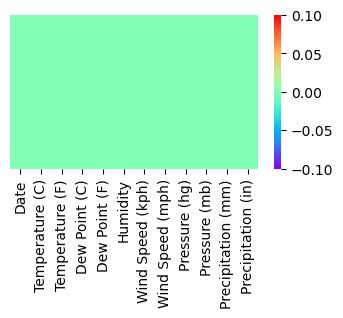

In [16]:

# data contains no null values
plt.figure(figsize=(4,2))
sns.heatmap(data.isnull(),cmap='rainbow',yticklabels=False)
plt.show()